In [95]:
import pandas as pd
import numpy as np
import re
import nltk

import importantFunctions as iFunc
from io import StringIO
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC

#Visualizations library
import seaborn as sns 
import matplotlib.pyplot as plt
import graphviz 

from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Model selection and evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [96]:

nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /home/saurabh/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/saurabh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/saurabh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/saurabh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/saurabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [98]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [99]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [100]:
iFunc.printDataInfo(train)

Dataset Shape:
(31962, 3)


Dataset Columns		    Features:
id        int64
label     int64
tweet    object
dtype: object


In [101]:
iFunc.printDataInfo(test)

Dataset Shape:
(17197, 2)


Dataset Columns		    Features:
id        int64
tweet    object
dtype: object


# Checking Null Data

In [102]:
iFunc.checkNull(train)

,Count,Percent


In [103]:
iFunc.checkNull(test)

,Count,Percent


# Cleaning Texts

In [104]:
def remo(features):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",features[0]).split())

train['tweet']=train[['tweet']].apply(remo, axis=1)
test['tweet']=test[['tweet']].apply(remo, axis=1)
    
print(train.head())
print(test.head())

   id  label                                              tweet
0   1      0  when a father is dysfunctional and is so selfi...
1   2      0  thanks for lyft credit i can t use cause they ...
2   3      0                                bihday your majesty
3   4      0      model i love u take with u all the time in ur
4   5      0                  factsguide society now motivation
      id                                              tweet
0  31963  studiolife aislife requires passion dedication...
1  31964  white supremacists want everyone to see the ne...
2  31965  safe ways to heal your acne altwaystoheal heal...
3  31966  is the hp and the cursed child book up for res...
4  31967  3rd bihday to my amazing hilarious nephew eli ...


# Stopwords

In [105]:
stopwords_nltk_en = set(stopwords.words('english'))
# stopwords_punct = set(punctuation)
# Combine the stopwords. Its a lot longer so I'm not printing it out...
# stoplist_combined = set.union(stopwords_nltk_en, stopwords_punct)
stoplist_combined = set.union(stopwords_nltk_en)

# Train Test Splitting

In [106]:
from sklearn.utils import shuffle
train = shuffle(train)

In [107]:
train, valid = train_test_split(train, test_size=0.2)

In [108]:
train_tags = train['label']
valid_tags = valid['label']

# Modelling

In [109]:
def calcAccuracy(op, pred):
    return (op == pred).sum()/pred.shape[0]

def calcError(op, pred):
    return (op != pred).sum()/pred.shape[0]

def printReport(y_train, trPredict, y_test, tePredict, mName):
    precV, recV, f1V, supV = precision_recall_fscore_support(y_test, tePredict, average='binary')
    accV = calcAccuracy(y_test, tePredict)
    errV = calcError(y_test, tePredict)
    precV = round(precV, 2)
    recV = round(recV, 2)
    f1V = round(f1V, 2)
    accV = round(accV, 2)
    errV = round(errV, 2)

    precTr, recTr, f1Tr, supTr = precision_recall_fscore_support(y_train, trPredict, average='binary')
    accTr = calcAccuracy(y_train, trPredict)
    errTr = calcError(y_train, trPredict)
    precTr = round(precTr, 2)
    recTr = round(recTr, 2)
    f1Tr = round(f1Tr, 2)
    accTr = round(accTr, 2)
    errTr = round(errTr, 2)

    print(mName, (9 - len(mName)) * ' ', '\t\tValid\t\tTrain(K-Fold)')
    print()
    print("Accuracy \t\t", accV, '\t\t', accTr)
    print("Error    \t\t", errV, '\t\t', errTr)
    print("Recall   \t\t", recV, '\t\t', recTr)
    print("Precision\t\t", precV,'\t\t', precTr)
    print("F1 Score \t\t", f1V, '\t\t', f1Tr)
    print()
    print("Classification Report of ", mName, " on test : ")
    cm = confusion_matrix(y_test, tePredict, labels=[0, 1])
    cm1 = confusion_matrix(y_train, trPredict, labels=[0, 1])
    plt.figure(figsize=(16,8))

    plt.subplot(1,2, 1)
    iFunc.plotConfusionMatrix(cm, classes=['Positive(0)', 'Negative(1)'],title='Valid Confusion matrix')
    plt.subplot(1,2, 2)
    iFunc.plotConfusionMatrix(cm1, classes=['Positive(0)', 'Negative(1)'],title='Train Confusion matrix')

    plt.tight_layout()
    plt.show()

In [122]:
params = {"tfidf__ngram_range": [(1, 2)], "svc__C": [0.001,.01, .1, 1, 10, 100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True, stop_words=stoplist_combined)), ("svc", LinearSVC())])

gs = GridSearchCV(clf, params, cv=5, verbose=2, n_jobs=-1, scoring='f1')

gs.fit(train['tweet'], train_tags)
print(gs.best_estimator_)
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svc__C=0.001, tfidf__ngram_range=(1, 2) .........................
[CV] svc__C=0.001, tfidf__ngram_range=(1, 2) .........................
[CV] svc__C=0.001, tfidf__ngram_range=(1, 2) .........................
[CV] svc__C=0.001, tfidf__ngram_range=(1, 2) .........................


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/saurabh/anaconda3/lib/python3.6/site-packages/skle

[CV] .......... svc__C=0.001, tfidf__ngram_range=(1, 2), total=   1.8s
[CV] svc__C=0.001, tfidf__ngram_range=(1, 2) .........................


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... svc__C=0.001, tfidf__ngram_range=(1, 2), total=   2.7s
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... svc__C=0.001, tfidf__ngram_range=(1, 2), total=   2.8s
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... svc__C=0.001, tfidf__ngram_range=(1, 2), total=   2.8s
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................


/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/saurabh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .......... svc__C=0.001, tfidf__ngram_range=(1, 2), total=   2.5s
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svc__C=0.01, tfidf__ngram_range=(1, 2), total=   2.4s
[CV] svc__C=0.01, tfidf__ngram_range=(1, 2) ..........................
[CV] ........... svc__C=0.01, tfidf__ngram_range=(1, 2), total=   2.7s
[CV] svc__C=0.1, tfidf__ngram_range=(1, 2) ...........................
[CV] ........... svc__C=0.01, tfidf__ngram_range=(1, 2), total=   2.3s
[CV] svc__C=0.1, tfidf__ngram_range=(1, 2) ...........................
[CV] ........... svc__C=0.01, tfidf__ngram_range=(1, 2), total=   2.7s
[CV] svc__C=0.1, tfidf__ngram_range=(1, 2) ...........................
[CV] ........... svc__C=0.01, tfidf__ngram_range=(1, 2), total=   2.3s
[CV] svc__C=0.1, tfidf__ngram_range=(1, 2) ...........................
[CV] ............ svc__C=0.1, tfidf__ngram_range=(1, 2), total=   2.5s
[CV] svc__C=0.1, tfidf__ngram_range=(1, 2) ...........................
[CV] .

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.8s finished


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
0.723361147843004


In [123]:
vPredict = gs.predict(valid['tweet'])
trPredict = gs.predict(train['tweet'])

LinearSVC  		Valid		Train(K-Fold)

Accuracy 		 0.97 		 1.0
Error    		 0.03 		 0.0
Recall   		 0.67 		 1.0
Precision		 0.82 		 1.0
F1 Score 		 0.74 		 1.0

Classification Report of  LinearSVC  on test : 


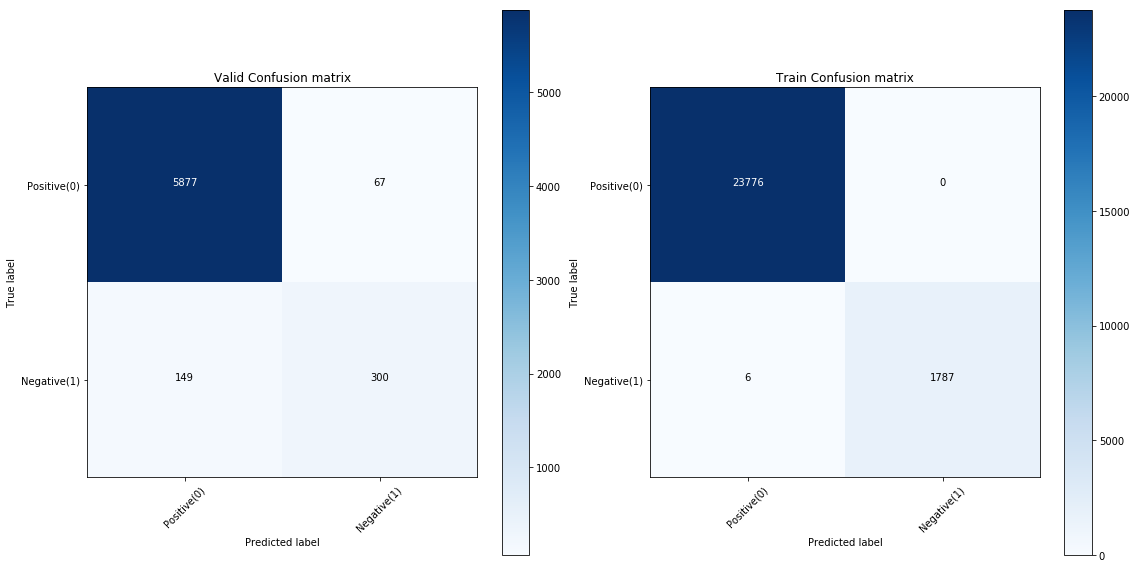

In [124]:
printReport(train_tags, trPredict, valid_tags, vPredict, 'LinearSVC')

In [125]:
tePred = gs.predict(test['tweet'])

In [126]:
prediction = pd.Series(tePred)
prediction.index = test['id'].index
df = pd.DataFrame({'id': test['id'], 'label': prediction}, index=test.index)

df.head()

df.to_csv('bestValidationSubmission.csv', index=False)